In [1]:
# import modules here
from prep_data import *
from visualizations import *
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

In [2]:
# data files
EXPERIMENT_1 = 'data/experiment1_data.csv'
EXPERIMENT_2 = 'data/experiment2_data.csv'

# Classification Models

## Experiment 1

In [3]:
# prepare the data
mode = 4
x_train, x_test, y_train, y_test = app_prep(EXPERIMENT_1, mode, seed=None)
app_names = ['0', '1', '2', '3', '4', '5']

### Dummy Classifier

Once again, we see how well this performs...

             precision    recall  f1-score   support

          0       0.61      0.48      0.54        23
          1       0.00      0.00      0.00         1
          2       0.33      0.17      0.22         6
          3       0.33      0.25      0.29         4
          4       0.00      0.00      0.00         2
          5       0.00      0.00      0.00         4

avg / total       0.43      0.33      0.37        40



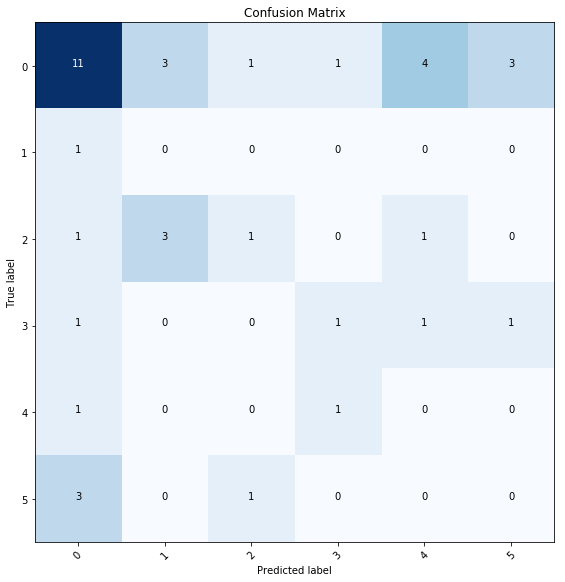

In [5]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)
# Make predictions
y_pred = dummy.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=app_names, title='Confusion Matrix')
plt.show()

### Random Forest

In [6]:
kFold = 5
param_grid = {'n_estimators': np.arange(10, 411, 100),
                'max_features': np.array(['sqrt', 'log2'])}
forest_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=kFold)

forest_grid.fit(x_train, y_train)
best_n = forest_grid.best_params_['n_estimators']
best_f = forest_grid.best_params_['max_features']

print("Best n estimators:    %f" % best_n)
print("Best max features:    %s" % best_f)

# rf = RandomForestClassifier()
# rf.fit(x_train, y_train)
joblib.dump(forest_grid, 'saved_models/e1_app_rf_m_' + str(mode) + '.pkl')

Best n estimators:    110.000000
Best max features:    log2


['saved_models/e1_app_rf_m_4.pkl']

             precision    recall  f1-score   support

          0       1.00      0.96      0.98        23
          1       0.50      1.00      0.67         1
          2       1.00      0.83      0.91         6
          3       1.00      1.00      1.00         4
          4       0.67      1.00      0.80         2
          5       1.00      1.00      1.00         4

avg / total       0.97      0.95      0.96        40



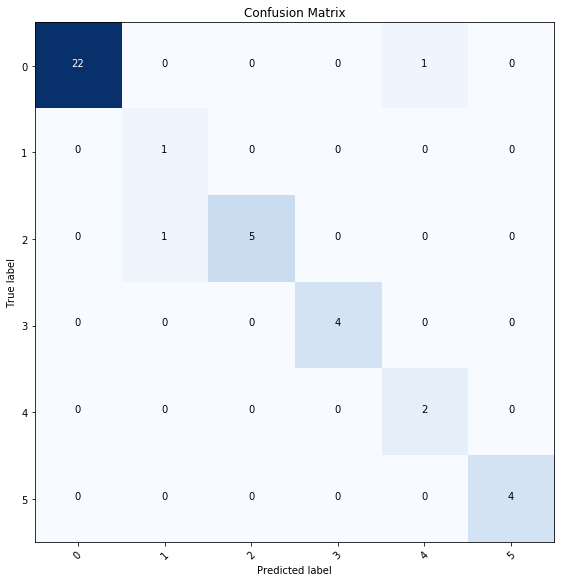

In [7]:
# Make predictions
y_pred = forest_grid.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=app_names, title='Confusion Matrix')
plt.show()

In [8]:
# I want to save these results to a txt file so I can view later
of_name = 'model_results/e1_app_rf_m_' + str(mode) + '.txt'
of = open(of_name, 'w')

of.write("Results of Grid Search:\n")
of.write("\tBest n estimators:      %f\n" % best_n)
of.write("\tBest max features:      %s\n" % best_f)
of.write("\t---\n")
of.write("\tBest Score:           %f\n\n" % forest_grid.best_score_)
of.write("Results on Test Data:\n")
of.write("\tScore:                %f\n" % forest_grid.score(x_test, y_test))

of.close()

### Adaboost

In [9]:
kFold = 5
param_grid = {'n_estimators': np.arange(50, 750, 100),
                'learning_rate': np.arange(0.25, 1.25, 0.25)}
adaboost_grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=kFold)

# test using training data
adaboost_grid.fit(x_train, y_train)
best_n = adaboost_grid.best_params_['n_estimators']
best_l = adaboost_grid.best_params_['learning_rate']

print("Best n estimators:    %f" % best_n)
print("Best learning rate:   %f" % best_l)

# abc = AdaBoostClassifier()
# abc.fit(x_train, y_train)
joblib.dump(adaboost_grid, 'saved_models/e1_app_ab_m_' + str(mode) + '.pkl')

Best n estimators:    450.000000
Best learning rate:   0.500000


['saved_models/e1_app_ab_m_4.pkl']

             precision    recall  f1-score   support

          0       0.92      0.96      0.94        23
          1       0.50      1.00      0.67         1
          2       0.71      0.83      0.77         6
          3       1.00      0.50      0.67         4
          4       0.00      0.00      0.00         2
          5       0.80      1.00      0.89         4

avg / total       0.83      0.85      0.83        40



/home/maxliu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


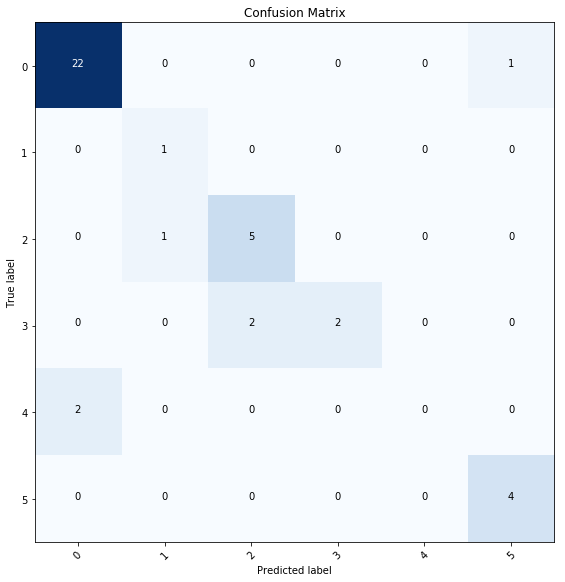

In [10]:
# Make predictions
y_pred = adaboost_grid.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=app_names, title='Confusion Matrix')
plt.show()

In [11]:
# I want to save these results to a txt file so I can view later
of_name = 'model_results/e1_app_ab_m_' + str(mode) + '.txt'
of = open(of_name, 'w')

of.write("Results of Grid Search:\n")
of.write("\tBest n estimators:      %f\n" % best_n)
of.write("\tBest learning rate:     %f\n" % best_l)
of.write("\t---\n")
of.write("\tBest Score:           %f\n\n" % adaboost_grid.best_score_)
of.write("Results on Test Data:\n")
of.write("\tScore:                %f\n" % adaboost_grid.score(x_test, y_test))

of.close()

### Gradient Boost

In [12]:
kFold = 5
param_grid = {'n_estimators': np.arange(100, 600, 100),
                'learning_rate': np.arange(0.25, 1.25, 0.25),
                 'max_features': np.array(['sqrt', 'log2'])}
gradient_grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=kFold)

# test using training data
gradient_grid.fit(x_train, y_train)
best_n = gradient_grid.best_params_['n_estimators']
best_l = gradient_grid.best_params_['learning_rate']
best_f = forest_grid.best_params_['max_features']

print("Best n estimators:    %f" % best_n)
print("Best learning rate:   %f" % best_l)
print("Best max features:    %s" % best_f)

# gbc = GradientBoostingClassifier()
# gbc.fit(x_train, y_train)
joblib.dump(gradient_grid, 'saved_models/e1_app_gb_m_' + str(mode) + '.pkl')

Best n estimators:    500.000000
Best learning rate:   0.250000
Best max features:    log2


['saved_models/e1_app_gb_m_4.pkl']

             precision    recall  f1-score   support

          0       1.00      0.91      0.95        23
          1       0.50      1.00      0.67         1
          2       1.00      0.83      0.91         6
          3       1.00      1.00      1.00         4
          4       0.50      1.00      0.67         2
          5       1.00      1.00      1.00         4

avg / total       0.96      0.93      0.94        40



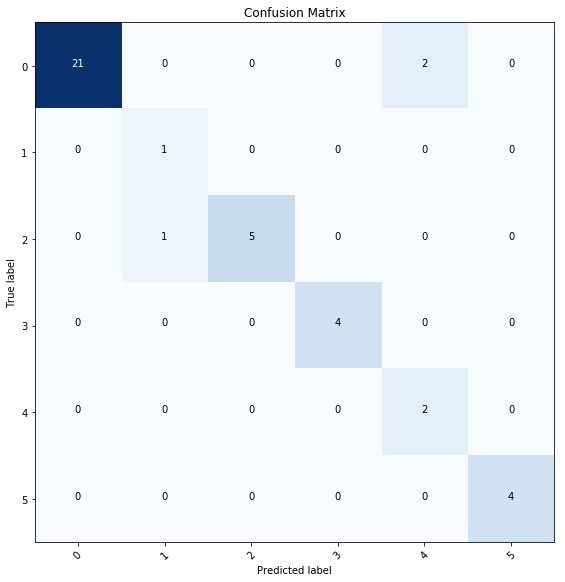

In [13]:
# Make predictions
y_pred = gradient_grid.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=app_names, title='Confusion Matrix')
plt.show()

In [14]:
# I want to save these results to a txt file so I can view later
of_name = 'model_results/e1_app_gb_m_' + str(mode) + '.txt'
of = open(of_name, 'w')

of.write("Results of Grid Search:\n")
of.write("\tBest n estimators:      %f\n" % best_n)
of.write("\tBest learning rate:     %f\n" % best_l)
of.write("\tBest max features:      %s\n" % best_f)
of.write("\t---\n")
of.write("\tBest Score:           %f\n\n" % gradient_grid.best_score_)
of.write("Results on Test Data:\n")
of.write("\tScore:                %f\n" % gradient_grid.score(x_test, y_test))

of.close()

## Experiment 2

In [3]:
# prepare the data
mode = 4 
x_train, x_test, y_train, y_test = app_prep(EXPERIMENT_2, mode, seed=None)
app_names = ['0', '1', '2', '3', '4', '5']

### Dummy Classifier

             precision    recall  f1-score   support

          0       0.50      0.54      0.52        72
          1       0.00      0.00      0.00         4
          2       0.18      0.20      0.19        20
          3       0.06      0.08      0.07        13
          4       0.10      0.07      0.08        15
          5       0.11      0.07      0.09        28

avg / total       0.30      0.31      0.30       152



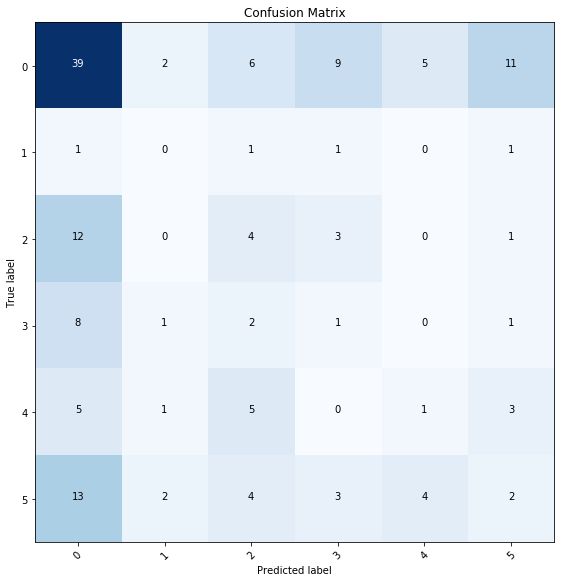

In [16]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)
# Make predictions
y_pred = dummy.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=app_names, title='Confusion Matrix')
plt.show()

### Random Forest

In [17]:
kFold = 5
param_grid = {'n_estimators': np.arange(10, 411, 100),
                'max_features': np.array(['sqrt', 'log2'])}
forest_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=kFold)

forest_grid.fit(x_train, y_train)
best_n = forest_grid.best_params_['n_estimators']
best_f = forest_grid.best_params_['max_features']

print("Best n estimators:    %f" % best_n)
print("Best max features:    %s" % best_f)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
joblib.dump(forest_grid, 'saved_models/e2_app_rf_m_' + str(mode) + '.pkl')

Best n estimators:    310.000000
Best max features:    sqrt


['saved_models/e2_app_rf_m_4.pkl']

             precision    recall  f1-score   support

          0       0.66      0.83      0.74        72
          1       1.00      1.00      1.00         4
          2       0.87      1.00      0.93        20
          3       1.00      1.00      1.00        13
          4       0.50      0.07      0.12        15
          5       0.47      0.32      0.38        28

avg / total       0.68      0.70      0.67       152



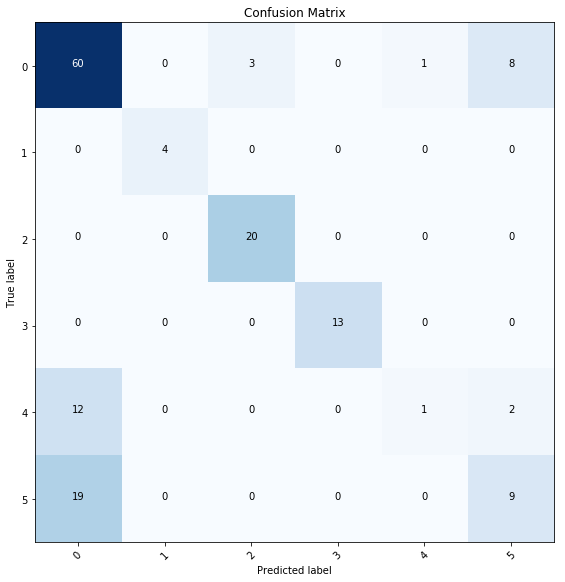

In [18]:
# Make predictions
y_pred = rf.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=app_names, title='Confusion Matrix')
plt.show()

In [19]:
# I want to save these results to a txt file so I can view later
of_name = 'model_results/e2_app_rf_m_' + str(mode) + '.txt'
of = open(of_name, 'w')

of.write("Results of Grid Search:\n")
of.write("\tBest n estimators:      %f\n" % best_n)
of.write("\tBest max features:      %s\n" % best_f)
of.write("\t---\n")
of.write("\tBest Score:           %f\n\n" % forest_grid.best_score_)
of.write("Results on Test Data:\n")
of.write("\tScore:                %f\n" % forest_grid.score(x_test, y_test))

of.close()

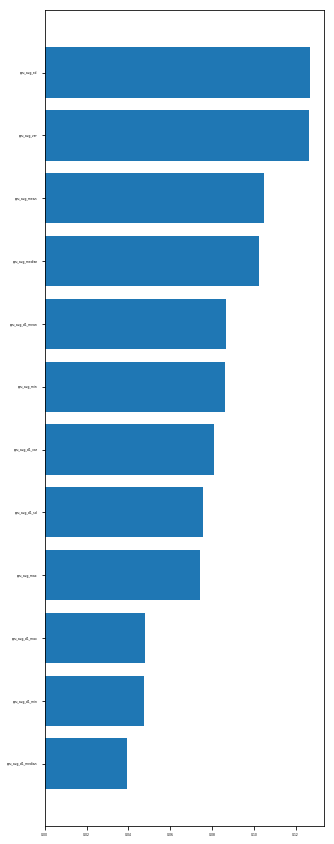

In [4]:
rf = RandomForestClassifier(n_estimators=310, max_features='sqrt')
rf.fit(x_train, y_train)

var_names = list(x_train)
var_scores = rf.feature_importances_

var_selection = dict(zip(var_names, var_scores))
var_selection = OrderedDict(sorted(var_selection.items(), key=lambda t: t[1]))

plt.rcParams.update({'font.size':15})
plt.figure(figsize=(5, 15))
plt.barh(range(len(var_selection)), list(var_selection.values()), align='center')
plt.yticks(range(len(var_selection)), list(var_selection.keys()))
plt.show()

### Adaboost

In [20]:
kFold = 5
param_grid = {'n_estimators': np.arange(50, 750, 100),
                'learning_rate': np.arange(0.25, 1.25, 0.25)}
adaboost_grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=kFold)

# test using training data
adaboost_grid.fit(x_train, y_train)
best_n = adaboost_grid.best_params_['n_estimators']
best_l = adaboost_grid.best_params_['learning_rate']

print("Best n estimators:    %f" % best_n)
print("Best learning rate:   %f" % best_l)

# abc = AdaBoostClassifier()
# abc.fit(x_train, y_train)
joblib.dump(adaboost_grid, 'saved_models/e2_app_ab_m_' + str(mode) +'.pkl')

Best n estimators:    250.000000
Best learning rate:   0.250000


['saved_models/e2_app_ab_m_4.pkl']

             precision    recall  f1-score   support

          0       0.60      0.86      0.71        72
          1       1.00      0.50      0.67         4
          2       0.79      0.95      0.86        20
          3       1.00      0.92      0.96        13
          4       0.00      0.00      0.00        15
          5       0.27      0.11      0.15        28

avg / total       0.55      0.64      0.58       152



/home/maxliu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


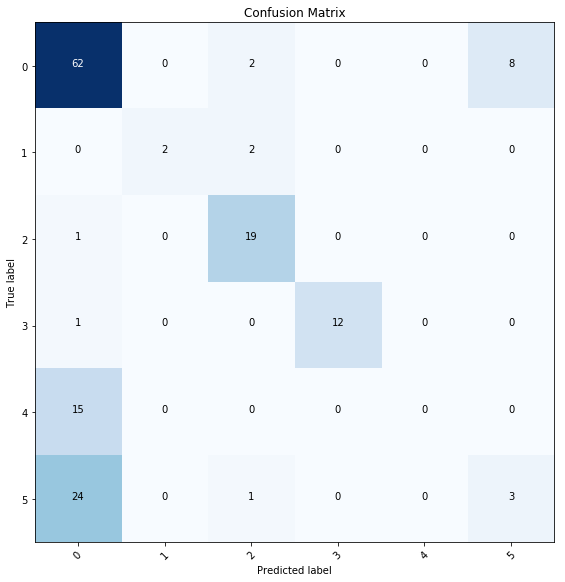

In [21]:
# Make predictions
y_pred = adaboost_grid.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=app_names, title='Confusion Matrix')
plt.show()

In [22]:
# I want to save these results to a txt file so I can view later
of_name = 'model_results/e2_app_ab_m_' + str(mode) + '.txt'
of = open(of_name, 'w')

of.write("Results of Grid Search:\n")
of.write("\tBest n estimators:      %f\n" % best_n)
of.write("\tBest learning rate:     %f\n" % best_l)
of.write("\t---\n")
of.write("\tBest Score:           %f\n\n" % adaboost_grid.best_score_)
of.write("Results on Test Data:\n")
of.write("\tScore:                %f\n" % adaboost_grid.score(x_test, y_test))

of.close()

### Gradient Boost

In [23]:
kFold = 5
param_grid = {'n_estimators': np.arange(100, 600, 100),
                'learning_rate': np.arange(0.25, 1.25, 0.25),
                 'max_features': np.array(['sqrt', 'log2'])}
gradient_grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=kFold)

# test using training data
gradient_grid.fit(x_train, y_train)
best_n = gradient_grid.best_params_['n_estimators']
best_l = gradient_grid.best_params_['learning_rate']
best_f = forest_grid.best_params_['max_features']

print("Best n estimators:    %f" % best_n)
print("Best learning rate:   %f" % best_l)
print("Best max features:    %s" % best_f)

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
joblib.dump(gradient_grid, 'saved_models/e2_app_gb_m_' + str(mode) + '.pkl')

Best n estimators:    200.000000
Best learning rate:   0.250000
Best max features:    sqrt


['saved_models/e2_app_gb_m_4.pkl']

             precision    recall  f1-score   support

          0       0.66      0.88      0.75        72
          1       1.00      0.50      0.67         4
          2       0.89      0.85      0.87        20
          3       1.00      1.00      1.00        13
          4       0.00      0.00      0.00        15
          5       0.48      0.39      0.43        28

avg / total       0.63      0.70      0.65       152



/home/maxliu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


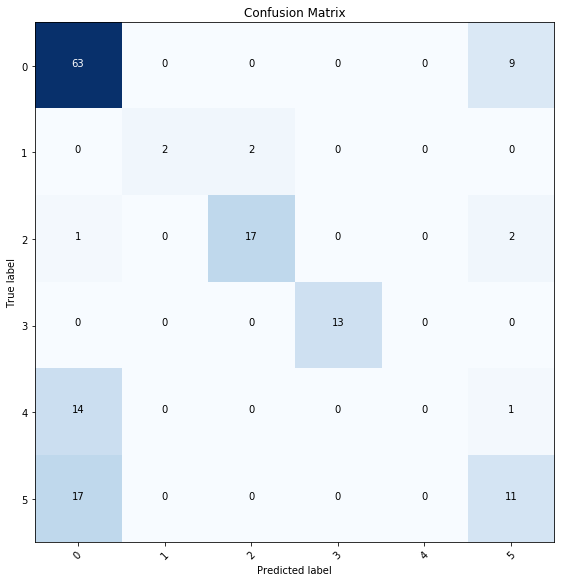

In [24]:
# Make predictions
y_pred = gradient_grid.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=app_names, title='Confusion Matrix')
plt.show()

In [25]:
# I want to save these results to a txt file so I can view later
of_name = 'model_results/e2_app_gb_m_' + str(mode) + '.txt'
of = open(of_name, 'w')

of.write("Results of Grid Search:\n")
of.write("\tBest n estimators:      %f\n" % best_n)
of.write("\tBest learning rate:     %f\n" % best_l)
of.write("\tBest max features:      %s\n" % best_f)
of.write("\t---\n")
of.write("\tBest Score:           %f\n\n" % gradient_grid.best_score_)
of.write("Results on Test Data:\n")
of.write("\tScore:                %f\n" % gradient_grid.score(x_test, y_test))

of.close()